# Adoption System  - Distance Part

Dataset Souce: https://www.kaggle.com/c/petfinder-adoption-prediction/data

## Setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import joblib

### Import Dataset

#### Train

In [2]:
#Import train dataset
df = pd.read_csv('../final_dataset/train.csv')

#Import test dataset
df_ong = pd.read_csv('../final_dataset/test.csv')

#Display all columns
pd.set_option('display.max_columns', None)


## Pipeline

In [3]:
pipeline = joblib.load('../model-v2.pkl')
df_model = pd.read_csv('../final_dataset/train.csv')
X_model = df_model[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed','Sterilized', 'Health','State', 'Fee_y']]
y_model = df_model['NonAdopted']
pipeline.fit(X_model, y_model)

#Import Breed Dictionary
breed_labels = pd.read_csv('../BreedLabels.csv')

#Import Colors Dictionary
color_labels = pd.read_csv('../ColorLabels.csv')

#Import State Dictionary
state_labels = pd.read_csv('../StateLabels.csv')

#Dictionary
my_dict = {state_labels.iloc[i,0]: state_labels.iloc[i,1] for i in range(len(state_labels['StateName']))}
my_dict_breed = {breed_labels.iloc[i,0]: breed_labels.iloc[i,2] for i in range(len(breed_labels['BreedName']))}
my_dict_gender = {1: 'Male', 2: 'Female', 3: 'Mixed'}
my_dict_color = {color_labels.iloc[i,0]: color_labels.iloc[i,1] for i in range(len(color_labels['ColorName']))}
my_dict_maturity = {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0: 'Not Specified'}
my_dict_length = {1: 'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'}
my_dict_vaccinated = {1: 'Yes', 2: 'No', 3: 'Not Sure'}
my_dict_dewormed = {1:'Yes', 2:'No', 3:'Not Sure'}
my_dict_sterilized = {1:'Yes', 2:'No', 3:'Not Sure'}
my_dict_health = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}
my_dict_fee = {0:'Free', 1:'Not Free'}

c:\users\letic\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Predição dos não adotados

In [4]:
#ONG Dataset
X= df[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed','Sterilized', 'Health', 'State', 'Fee_y']]
P_non_adopt = pipeline.predict_proba(X)[:,1]
df['P_non_adopt'] = P_non_adopt
df.sort_values(['P_non_adopt'], ascending = False, inplace = True)

In [5]:
from scipy.spatial.distance import pdist, squareform

In [6]:
X

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Fee_y
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,41326,1
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,41401,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,41326,0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,41401,1
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,41326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11560,1,24,179,307,1,2,3,7,2,2,3,3,2,1,41326,0
11561,2,1,266,0,2,5,6,7,2,1,2,1,2,1,41401,0
11562,1,6,195,0,2,1,7,0,1,3,1,1,2,1,41401,0
11563,2,9,266,0,2,4,7,0,1,1,1,1,1,1,41336,0


### Criando o ponto de inserção do usuário

In [7]:
#X_example = pd.DataFrame(data=np.zeros(shape=(1, X.shape[1])), columns=X.columns)
#X_example

In [8]:
X_example = pd.DataFrame({'Type': [1],
           'Breed1': [307],
           'Breed2': [0],
           'Gender' : [2],
           'Color1': [1],
           'Color2': [0],
           'Color3':[0],
           'MaturitySize': [2],
           'FurLength':[1],
           'Vaccinated': [1],
           'Dewormed': [1],
           'Sterilized': [2],
           'Health': [1],
           'Quantity': [1],
           'State': [41326],
           'Fee_y': [0],
           }, 
           )

#### Usuário inserindo o ponto

In [9]:
tipo = 1
gender = 1
size =1

In [10]:
X_example.loc[0, 'Type'] = tipo
X_example.loc[0, 'Gender'] = gender
X_example.loc[0, 'MaturitySize'] = size

In [11]:
X_example

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y
0,1,307,0,1,1,0,0,1,1,1,1,2,1,1,41326,0


In [12]:
X_results = X.copy()

In [13]:
X_example = pd.DataFrame({'Type': [1],
           'Breed1': [307],
           'Breed2': [0],
           'Gender' : [2],
           'Color1': [1],
           'Color2': [0],
           'Color3':[0],
           'MaturitySize': [2],
           'FurLength':[1],
           'Vaccinated': [1],
           'Dewormed': [1],
           'Sterilized': [2],
           'Health': [1],
           'Quantity': [1],
           'State': [41326],
           'Fee_y': [0],
           }, 
           )

In [14]:
X_example

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y
0,1,307,0,2,1,0,0,2,1,1,1,2,1,1,41326,0


In [15]:
X_results = X.copy()
X_results['score'] = pipeline['modelling'].predict_proba(X_results)[:, 1]

In [16]:
X_results['score'].value_counts()

1.0    11565
Name: score, dtype: int64

In [17]:
concatted = pd.concat([X_example, X]).reset_index(drop=True)

In [18]:
(int(X_example['Type']))

1

In [19]:
concatted2 = concatted[(concatted['Type']==(int(X_example['Type'])))&(concatted['Gender']==(int(X_example['Gender'])))&(concatted['MaturitySize']==(int(X_example['MaturitySize'])))]

In [20]:
concatted2 

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y,Age
0,1,307,0,2,1,0,0,2,1,1,1,2,1,1.0,41326,0,NaN
4,1,307,0,2,1,2,0,2,1,1,1,2,1,NaN,41401,1,4.0
13,1,307,0,2,2,5,7,2,2,3,3,3,1,NaN,41401,0,3.0
16,1,307,307,2,2,0,0,2,1,2,1,1,1,NaN,41330,1,8.0
17,1,307,0,2,1,0,0,2,1,2,1,2,1,NaN,41401,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,1,307,307,2,2,7,0,2,2,2,2,2,1,NaN,41326,0,2.0
11553,1,307,0,2,2,7,0,2,2,1,1,1,1,NaN,41327,0,24.0
11555,1,307,0,2,2,0,0,2,1,1,1,1,1,NaN,41401,0,4.0
11558,1,307,0,2,2,7,0,2,2,2,2,2,1,NaN,41326,0,8.0


In [21]:
index = pd.DataFrame(squareform(pdist(concatted2)), columns=concatted2.index, index=concatted2.index).iloc[:, 0].sort_values().head(10).index

In [22]:
index

Int64Index([0, 4, 13, 16, 17, 18, 19, 36, 42, 46], dtype='int64')

In [23]:
index2= pd.DataFrame(squareform(pdist(concatted)), columns=concatted.index, index=concatted.index).iloc[:, 0].sort_values().head(10).index

In [24]:
index2

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [25]:
X_results.loc[index].sort_values(by='score', ascending = False)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,Fee_y,score
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,41326,1,1.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,41326,0,1.0
13,1,78,218,205,1,1,7,0,2,2,3,3,3,1,41326,0,1.0
16,1,2,307,0,2,1,0,0,2,1,2,1,2,1,41401,0,1.0
17,1,12,307,0,2,2,7,0,2,2,2,1,1,1,41326,0,1.0
18,1,10,307,117,2,1,2,7,2,2,1,1,1,1,41326,0,1.0
19,2,3,266,0,1,2,7,0,1,1,2,1,2,1,41401,0,1.0
36,2,60,264,0,1,1,2,7,3,3,1,1,1,1,41326,0,1.0
42,1,4,307,0,1,5,0,0,3,2,2,2,2,1,41326,0,1.0
46,1,2,307,0,1,1,2,0,2,2,2,2,2,1,41327,0,1.0


In [26]:
X_results = X.copy()
X_results['score'] = pipeline['modelling'].predict_proba(X_results)[:, 1]

concatted = pd.concat([X_example, X]).reset_index(drop=True)
concatted2 = concatted[(concatted['Type']==(int(X_example['Type'])))&(concatted['Gender']==(int(X_example['Gender'])))&(concatted['MaturitySize']==(int(X_example['MaturitySize'])))]
index = pd.DataFrame(squareform(pdist(concatted2, p=1)), columns=concatted2.index, index=concatted2.index).iloc[:, 0].sort_values().head(11).index
Z = concatted2.loc[index].drop(0)
Z.drop(columns='Quantity', inplace=True)
Z['score'] = pipeline['modelling'].predict_proba(Z)[:, 1]
sug = Z.sort_values(by='score', ascending = False)

In [27]:
concatted = pd.concat([X_example, X]).reset_index(drop=True)
concatted2 = concatted[(concatted['Type']==(int(X_example['Type'])))&(concatted['Gender']==(int(X_example['Gender'])))&(concatted['MaturitySize']==(int(X_example['MaturitySize'])))]
index = pd.DataFrame(squareform(pdist(concatted2, p=1)), columns=concatted2.index, index=concatted2.index).iloc[:, 0].sort_values().head(11).index
concatted2.loc[index].drop(0)


,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y,Age
4,1,307,0,2,1,2,0,2,1,1,1,2,1,NaN,41401,1,4.0
13,1,307,0,2,2,5,7,2,2,3,3,3,1,NaN,41401,0,3.0
16,1,307,307,2,2,0,0,2,1,2,1,1,1,NaN,41330,1,8.0
17,1,307,0,2,1,0,0,2,1,2,1,2,1,NaN,41401,0,2.0
18,1,307,0,2,2,7,0,2,2,2,1,1,1,NaN,41326,0,12.0
19,1,307,117,2,1,2,7,2,2,1,1,1,1,NaN,41326,0,10.0
36,1,307,0,2,2,7,0,2,1,1,1,1,1,NaN,41326,0,72.0
42,1,307,0,2,5,0,0,2,2,1,1,1,1,NaN,41326,0,24.0
46,1,307,0,2,2,5,0,2,1,2,2,1,1,NaN,41326,0,60.0
48,1,205,0,2,2,5,0,2,2,1,1,2,1,NaN,41326,0,48.0


In [28]:
X_example

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y
0,1,307,0,2,1,0,0,2,1,1,1,2,1,1,41326,0


In [29]:
prob = pd.read_csv('df_ong.csv')
concatted = pd.concat([X_example, prob]).reset_index(drop=True)
concatted_drop = concatted.drop(columns = ['Unnamed: 0','Name','Age','Fee','RescuerID','VideoAmt','Description','PetID','PhotoAmt','Photo','P_non_adopt'])
index = pd.DataFrame(squareform(pdist(concatted_drop, p=1)), columns=concatted_drop.index, index=concatted_drop.index).iloc[:, 0].sort_values().head(11).index
index

Int64Index([0, 377, 398, 380, 1630, 1629, 1628, 362, 876, 389, 323], dtype='int64')

In [30]:
concatted_drop.loc[index].drop(0)

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y
377,1,307,0,2,1,0,0,2,1,1,1,2,1,1,41326,0
398,1,307,0,2,2,0,0,2,1,1,1,2,1,1,41326,0
380,1,307,0,1,1,0,0,2,1,1,1,2,1,1,41326,0
1630,1,307,0,2,2,0,0,2,1,1,1,2,1,1,41326,0
1629,1,307,0,2,1,0,0,2,1,1,1,1,1,1,41326,0
1628,1,307,0,2,2,0,0,2,1,1,1,2,1,1,41326,0
362,1,307,0,2,1,0,0,2,1,1,1,1,1,1,41326,0
876,1,307,0,2,1,0,0,2,1,1,1,2,1,1,41327,0
389,1,307,0,2,1,0,0,2,1,1,1,1,1,1,41326,0
323,1,307,0,2,2,0,0,2,1,1,1,2,1,1,41326,0


## FINDING FREQUENCES

In [31]:
'Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed','Sterilized', 'Health', 'Quantity', 'State', 'Fee_y'

('Type',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'State',
 'Fee_y')

In [32]:
concatted['Type']

0       1
1       2
2       2
3       2
4       2
       ..
3054    2
3055    2
3056    2
3057    1
3058    1
Name: Type, Length: 3059, dtype: int64

In [33]:
df['Type'].value_counts()

1    6622
2    4943
Name: Type, dtype: int64

In [34]:
df['Breed1'].value_counts()

307    4630
266    2607
265     865
299     244
264     223
       ... 
97        1
81        1
212       1
268       1
298       1
Name: Breed1, Length: 166, dtype: int64

In [35]:
df['Breed2'].value_counts()

0      8491
307    1315
266     332
265     199
299     101
       ... 
50        1
4         1
2         1
237       1
83        1
Name: Breed2, Length: 128, dtype: int64

In [36]:
df['Gender'].value_counts()

2    6478
1    5087
Name: Gender, dtype: int64

In [37]:
df['Color1'].value_counts()

1    5261
2    3078
3     791
5     766
7     593
6     576
4     500
Name: Color1, dtype: int64

In [38]:
df['Color2'].value_counts()

0    3978
7    2925
2    2214
5     788
6     660
4     536
3     464
Name: Color2, dtype: int64

In [39]:
df['Color3'].value_counts()

0    9029
7    1868
5     235
6     198
4     124
3     111
Name: Color3, dtype: int64

In [40]:
df['MaturitySize'].value_counts()

2    8016
1    2480
3    1041
4      28
Name: MaturitySize, dtype: int64

In [41]:
df['FurLength'].value_counts()

1    6687
2    4165
3     713
Name: FurLength, dtype: int64

In [42]:
df['Vaccinated'].value_counts()

1    5082
2    4964
3    1519
Name: Vaccinated, dtype: int64

In [43]:
df['Dewormed'].value_counts()

1    7074
2    3070
3    1421
Name: Dewormed, dtype: int64

In [44]:
df['Sterilized'].value_counts()

2    7510
1    2709
3    1346
Name: Sterilized, dtype: int64

In [45]:
df['Health'].value_counts()

1    11123
2      412
3       30
Name: Health, dtype: int64

In [46]:
df['Quantity'].value_counts()

1    11565
Name: Quantity, dtype: int64

In [47]:
df['State'].value_counts()

41326    6835
41401    2927
41327     654
41336     359
41330     316
41332     167
41324     105
41325      88
41335      55
41361      23
41345      16
41367      10
41342       9
41415       1
Name: State, dtype: int64

In [48]:
df['Fee_y'].value_counts()

0    9596
1    1969
Name: Fee_y, dtype: int64

Type= 1
Breed1 = 307
Breed2 = 0
Gender = 2
Color1 = 1
Color2 = 0
Color3 = 0
MaturitySize = 2
FurLength = 1
Vaccinated = 1
Dewormed = 1
Sterilized = 2
Health = 1
Quantity = 1 
State = 41326
Fee_y = 0

In [49]:
X_example = pd.DataFrame({'Type': [1],
           'Breed1': [307],
           'Breed2': [0],
           'Gender' : [2],
           'Color1': [1],
           'Color2': [0],
           'Color3':[0],
           'MaturitySize': [2],
           'FurLength':[1],
           'Vaccinated': [1],
           'Dewormed': [1],
           'Sterilized': [2],
           'Health': [1],
           'Quantity': [1],
           'State': [41326],
           'Fee_y': [0],
           }, 
           )

In [50]:
X_example

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,Fee_y
0,1,307,0,2,1,0,0,2,1,1,1,2,1,1,41326,0


In [51]:
dogs = df[df['Type']==1]
dogs

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,NonAdopted,Fee_y,P_non_adopt
7983,1,Xiao Hei,60,132,0,2,1,0,0,2,1,3,3,3,1,1,0,41401,30f14c9a639f76a1b7f3b7f95a7df0fe,0,This is a good dog. She needs a good home. Onl...,c82b8b2c4,2.0,4,1,0,0.988730
8036,1,Johnny,60,132,0,1,2,0,0,2,1,3,3,3,1,1,0,41401,30f14c9a639f76a1b7f3b7f95a7df0fe,1,This is a good dog. Only serious and genuine d...,db745332f,2.0,4,1,0,0.988719
7445,1,Browny,1,11,0,2,2,0,0,2,2,2,2,2,1,1,0,41401,9135bafac19da2434053b1d3485e181a,0,"Hey this snowy sister , i wanted to keep her b...",b1c7e0838,4.0,4,1,0,0.952772
3785,1,Snowy (american Cocker Spaniel),1,11,0,2,7,0,0,2,3,2,2,2,1,1,0,41401,9135bafac19da2434053b1d3485e181a,0,Last month my baby girl give birth to 3 health...,3b901ae31,4.0,4,1,0,0.942714
10337,1,Enzo,238,307,0,1,7,0,0,2,1,1,1,1,1,1,0,41327,b39c5db7a450d0f3437ada1df3554db6,0,"Enzo was adopted from a pet store, and raised ...",e01f077a7,10.0,4,1,0,0.914850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,1,Totoro,3,224,307,1,1,2,7,2,2,2,1,2,1,1,0,41326,5645f8bc8caac142fe7f4e3ab4369d45,0,Totoro is active and highly alert puppy. A per...,22992ecd0,5.0,1,0,0,0.032735
1364,1,Fluffy Snow,8,108,307,2,4,5,7,2,3,1,1,2,1,1,0,41326,db784cbcf321e1d8856b312638b94113,0,This poor girl was left at the vet by her owne...,144ad89a5,5.0,2,0,0,0.032668
1159,1,Mummy,36,155,155,2,4,7,0,2,2,2,1,2,1,1,0,41401,8eea2aaadbfd3e42337c519d9280dcca,0,I met Mummy in an organic farm.She is a taille...,b4475834d,3.0,2,0,0,0.026029
2334,1,Mei Mei,18,155,155,2,2,7,0,2,2,2,1,2,1,1,0,41401,8eea2aaadbfd3e42337c519d9280dcca,0,I met Mei Mei in an organic farm. The farm thr...,14580436c,3.0,2,0,0,0.021427


In [52]:
pd.read_csv('df_ong.csv')

,Unnamed: 0,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,Fee_y,Photo,P_non_adopt
0,0,2,Chi Chi,36,285,264,2,1,4,7,2,3,1,1,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0,0,f153b465f-1,0.205894
1,1,2,Sticky,2,265,0,1,6,7,0,2,2,1,1,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0,1,3c90f3f54-4,0.161106
2,2,2,Cuddles,12,265,0,1,2,3,7,2,2,1,1,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.0,0,09f0df7d1-5,0.290966
3,3,2,Porridge,4,265,0,1,6,7,0,2,2,1,1,2,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,Porridge the cat is looking for a place to cal...,0487529d4,3.0,0,0487529d4-3,0.143424
4,4,2,Sultan [In Shah Alam],24,265,0,1,6,7,0,2,2,1,1,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,We first met Sultan on our campus hiding from ...,bae7c4b1c,2.0,0,bae7c4b1c-2,0.303676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,3053,2,Baby,1,266,0,2,2,0,0,1,1,2,2,2,1,1,0,41326,eee5d6de07c5393092b82eb9ad83fb5c,0,I found this little weak kitty my condo. She ...,bb6aead09,3.0,0,bb6aead09-3,0.180229
3054,3054,2,Simba,8,303,0,2,1,4,7,2,2,3,3,1,2,1,0,41401,2ffc47cfbb3b623034606d5874a72246,0,Meet Simba! She's been living around Pusat Ban...,8ec8828d8,3.0,0,8ec8828d8-3,0.335035
3055,3055,2,Bujal,16,265,0,1,2,5,6,3,2,1,1,3,1,1,50,41326,37ef2acf54eaee295309e14b143a067e,0,"very tame,and loving cats.eat iams kitten and ...",275ad28b9,2.0,1,275ad28b9-2,0.284184
3056,3056,1,Spot,30,307,307,1,1,2,7,2,1,3,1,2,1,1,0,41326,d83be5f5e2d04e24d7376e99eafd8708,0,Very good guard dog. Healthy was found in Fron...,83432904d,2.0,0,83432904d-2,0.273286


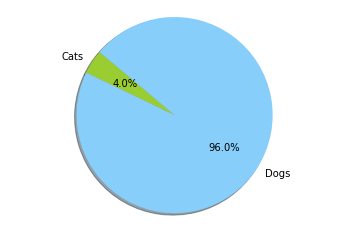

In [53]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Cats','Dogs'
sizes = [4,96]
colors = ['yellowgreen','lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()